In [2]:
import pymongo
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [3]:
mc = pymongo.MongoClient() 

db = mc['movies_metadata']


In [4]:
mc.database_names()

['admin', 'local', 'movies_metadata', 'nyt_dump', 'tweets']

In [5]:
db.collection_names()

['test', 'movies', 'movies_backup', 'movies_clean_v2', 'movies_clean']

In [6]:
test = db['test']  # Use (or create) a collection called 'test'
movies = db['movies'] #Create a collection called movies
movies_clean_v2 = db['movies_clean_v2']

In [7]:
len(list(movies_clean_v2.find()))

1583

In [8]:
df_clean = pd.DataFrame(list(movies_clean_v2.find()))
df_clean.head()

,_id,data,title
0,5af4cd0d7cfdd30e1919a126,"{'Casting Director': 'Nick Horbaczewski', 'Dom...",Star Wars Ep. VIII: The Last Jedi (2017)
1,5af4cd0d7cfdd30e1919a127,{'Visual Effects Supervisor': 'Chris Corbould'...,Beauty and the Beast (2017)
2,5af4cd0d7cfdd30e1919a128,"{'Set Decorator': ['Tim Rice', 'Danielle Berma...",The Fate of the Furious (2017)
3,5af4cd0d7cfdd30e1919a129,"{'Second Unit Director': 'Jack Gill', 'Domesti...",Despicable Me 3 (2017)
4,5af4cd0e7cfdd30e1919a12a,"{'Score Mixer': 'Noah Snyder', 'Domestic Box O...",Jumanji: Welcome to the Jungle (2017)


In [128]:
df_clean_data = pd.DataFrame(list(df_clean['data']))
df_clean_data.head()

,,1st Assistant Director,3-D and Digital Image Producer,3D Animator,3D Stereoscopic Supervisor,ADR Editor,ADR Mixer,ADR Recording Engineer,ADR/Dialogue Editor,Action Choreographer,...,Visual Effects Supervisor: MPC,Visual Effects Supervisor: Milk Visual Effects,Visual Effects by,Wardrobe Supervisor,Worldwide Box Office,Written By,Written by,based on the novel “A Monster Calls” by,lead_cast,story based on a novel by
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1320214241,NaN,NaN,NaN,"[Mark Hamill, Carrie Fisher, Adam Driver, Dais...",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1263109573,NaN,NaN,NaN,"[Emma Watson, Dan Stevens, Luke Evans, Kevin K...",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1237466026,NaN,NaN,NaN,"[Vin Diesel, Dwayne Johnson, Jason Statham, Mi...",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1034542646,NaN,NaN,NaN,"[Vin Diesel, Dwayne Johnson, Jason Statham, Mi...",NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,958513171,NaN,NaN,NaN,"[Dwayne Johnson, Jack Black, Kevin Hart, Karen...",NaN


In [9]:
df_clean_data_trim = df_clean_data.loc[:, ['Worldwide Box Office', 'Domestic Box Office', 'International Box Office','Production Budget','Source']]
df_clean_data_trim

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source
0,1320214241,620181382,700032859,NaN,Original Screenplay
1,1263109573,504014165,759095408,160000000,Remake
2,1237466026,225764765,1011701261,250000000,Original Screenplay
3,1034542646,264624300,769918346,75000000,Original Screenplay
4,958513171,404353892,554159279,90000000,Original Screenplay
5,880210429,334201140,546009289,175000000,Based on Comic/Graphic Novel
6,863197744,389813101,473384643,200000000,Based on Comic/Graphic Novel
7,850653412,315058289,535595123,180000000,Based on Comic/Graphic Novel
8,817012815,412563408,404449407,150000000,Based on Comic/Graphic Novel
9,800398408,209726015,590672393,175000000,Based on Folk Tale/Legend/Fairytale


In [10]:
# df_clean_data_trim['WW Aggregate'] = int(df_clean_data_trim['Domestic Box Office']) + int(df_clean_data_trim['International Box Office'])
# df_clean_data_trim

df_clean_data_trim['Domestic Box Office'].fillna(0, inplace=True)
df_clean_data_trim['International Box Office'].fillna(0, inplace=True)
df_clean_data_trim['Production Budget'].fillna(10000000, inplace=True)

df_clean_data_trim['Domestic Box Office'] = df_clean_data_trim['Domestic Box Office'].apply(pd.to_numeric)
df_clean_data_trim['International Box Office'] = df_clean_data_trim['International Box Office'].apply(pd.to_numeric)
df_clean_data_trim['ww_agg'] = df_clean_data_trim['Domestic Box Office'] + df_clean_data_trim['International Box Office']
df_clean_data_trim['Production Budget'] = df_clean_data_trim['Production Budget'].apply(pd.to_numeric)

df_clean_data_trim['log_ww_agg'] = df_clean_data_trim['ww_agg'].apply(np.log)
df_clean_data_trim['log_budget'] = df_clean_data_trim['Production Budget'].apply(np.log)

df_clean_data_trim.head()

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source,ww_agg,log_ww_agg,log_budget
0,1320214241,620181382,700032859,10000000,Original Screenplay,1320214241,21.001060,16.118096
1,1263109573,504014165,759095408,160000000,Remake,1263109573,20.956842,18.890684
2,1237466026,225764765,1011701261,250000000,Original Screenplay,1237466026,20.936332,19.336971
3,1034542646,264624300,769918346,75000000,Original Screenplay,1034542646,20.757225,18.132999
4,958513171,404353892,554159279,90000000,Original Screenplay,958513171,20.680894,18.315320


In [11]:
x = df_clean_data.loc[:,'MPAA Rating']

In [12]:
x_str = x.apply(lambda a: str(a))


In [13]:
first_words = x_str.apply(lambda a: a.split()[0])

In [67]:
def parse_mpaa_col(dataframe):
    ratings = dataframe.loc[:,'MPAA Rating']
    ratings = ratings.apply(lambda a: str(a))
    ratings = ratings.apply(lambda b: b.split()[0])
    ratings = ratings.apply(strip_text)
    return ratings
def strip_text(bad_text):
    if bad_text.endswith('(Rating'):
        bad_text = bad_text.replace('(Rating', '')
    return bad_text


In [69]:
ratings = parse_mpaa_col(df_clean_data)

In [70]:
ratings

0       PG-13
1          PG
2       PG-13
3          PG
4       PG-13
5       PG-13
6       PG-13
7       PG-13
8       PG-13
9          PG
10      PG-13
11          R
12      PG-13
13          R
14      PG-13
15      PG-13
16         PG
17      PG-13
18      PG-13
19         PG
20      PG-13
21          R
22          G
23          R
24      PG-13
25      PG-13
26         PG
27          R
28         PG
29         PG
        ...  
1553      Not
1554      Not
1555      Not
1556        R
1557      nan
1558      Not
1559        R
1560      Not
1561      Not
1562        R
1563      Not
1564      Not
1565      Not
1566      Not
1567        R
1568        R
1569      Not
1570        R
1571      nan
1572      nan
1573        R
1574        R
1575        R
1576      nan
1577        R
1578        R
1579      Not
1580       PG
1581      Not
1582      Not
Name: MPAA Rating, Length: 1583, dtype: object

In [71]:
ratings.unique()

array(['PG-13', 'PG', 'R', 'G', 'nan', 'Not'], dtype=object)

In [16]:
df_clean_data['MPAA Rating'].unique()

array(['PG-13', 'PG', 'R', 'G(Rating', 'nan', 'Not', 'G'], dtype=object)

(array([ 490.,   11.,    9.,   10.,   10.,    9.,   11.,   11.,   11.,
          11.,   11.,   11.,   11.,   11.,   10.,   12.,   11.,   11.,
          12.,   10.,   12.,   11.,   10.,   10.,   10.,   11.,   10.,
          10.,   11.,   11.,   11.,   11.,   11.,    9.,   11.,   10.,
          10.,   10.,   12.,   12.,   13.,   12.,   10.,   12.,   12.,
          11.,   11.,   11.,   11.,   11.,   12.,   11.,   11.,   11.,
          13.,   11.,   11.,   12.,   12.,   11.,   11.,   12.,   11.,
          11.,   11.,   11.,   11.,   12.,   11.,   11.,   11.,   11.,
          10.,   12.,   11.,   11.,   12.,   12.,   12.,   11.,   11.,
          11.,   10.,   11.,   11.,   12.,   11.,   11.,   11.,   11.,
          10.,   12.,   11.,   11.,   11.,   11.,   12.,   11.,   11.,   13.]),
 array([ -1.00000000e+00,   1.00200000e+01,   2.10400000e+01,
          3.20600000e+01,   4.30800000e+01,   5.41000000e+01,
          6.51200000e+01,   7.61400000e+01,   8.71600000e+01,
          9.81800000e+01

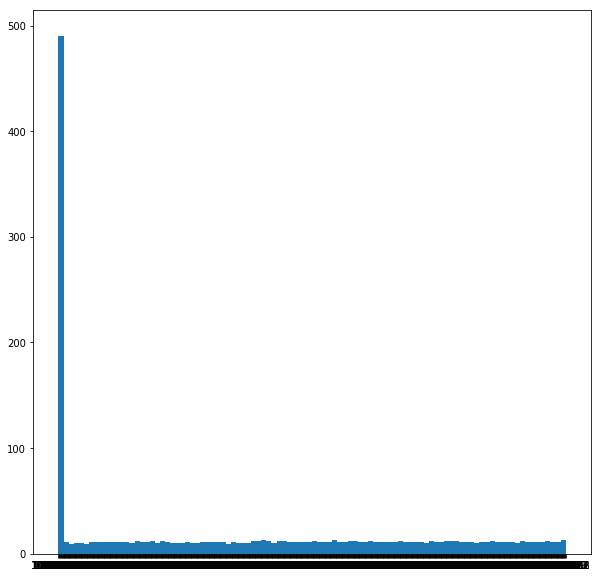

In [17]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_clean_data_trim['Worldwide Box Office'], bins = 100)

(array([  1.22400000e+03,   7.30000000e+01,   5.10000000e+01,
          3.10000000e+01,   2.30000000e+01,   2.00000000e+01,
          1.60000000e+01,   1.20000000e+01,   1.50000000e+01,
          1.00000000e+01,   7.00000000e+00,   1.00000000e+01,
          4.00000000e+00,   3.00000000e+00,   7.00000000e+00,
          5.00000000e+00,   7.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
        

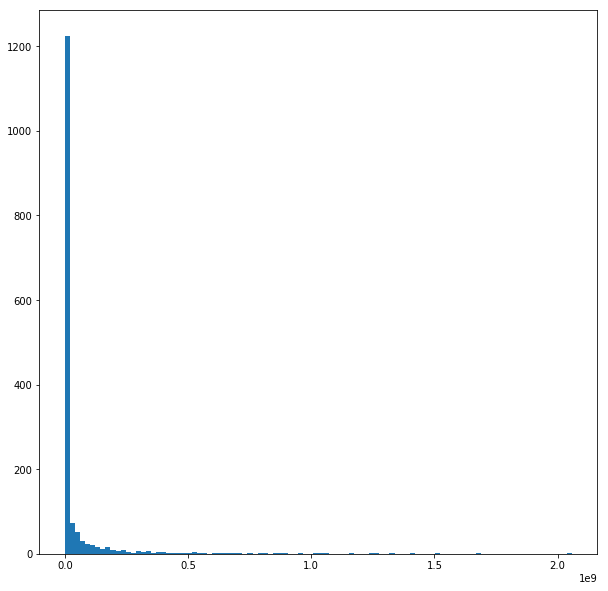

In [18]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_clean_data_trim['ww_agg'], bins = 100)

In [19]:
df_clean_data_trim['MPAA Rating'] = df_clean_data['MPAA Rating']

In [20]:
df_clean_data_trim.head()

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source,ww_agg,log_ww_agg,log_budget,MPAA Rating
0,1320214241,620181382,700032859,10000000,Original Screenplay,1320214241,21.001060,16.118096,PG-13
1,1263109573,504014165,759095408,160000000,Remake,1263109573,20.956842,18.890684,PG
2,1237466026,225764765,1011701261,250000000,Original Screenplay,1237466026,20.936332,19.336971,PG-13
3,1034542646,264624300,769918346,75000000,Original Screenplay,1034542646,20.757225,18.132999,PG
4,958513171,404353892,554159279,90000000,Original Screenplay,958513171,20.680894,18.315320,PG-13


In [21]:
groups_ratings = df_clean_data_trim.groupby('MPAA Rating')

In [22]:
groups_ratings.mean()

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget
MPAA Rating,,,,,,
G,1.584332e+06,7.409785e+05,1.000000e+07,2.325310e+06,13.922940,16.118096
G(Rating,3.213823e+07,3.628246e+07,1.800000e+07,6.842069e+07,14.503724,16.117091
Not,1.154041e+05,2.472487e+05,9.645527e+06,3.626528e+05,10.371083,15.996240
PG,5.658844e+07,8.953818e+07,3.967164e+07,1.461266e+08,15.612146,16.818635
PG-13,5.444800e+07,9.027305e+07,4.553883e+07,1.447210e+08,16.201803,16.854002
R,1.514025e+07,1.758438e+07,1.612964e+07,3.272462e+07,13.991456,16.255614
nan,0.000000e+00,9.687077e+05,1.000000e+07,9.687077e+05,10.758669,16.118096


In [23]:
groups_ratings.median()

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget
MPAA Rating,,,,,,
G,1584332.0,740978.5,10000000.0,2325310.5,13.922940,16.118096
G(Rating,3998619.5,378256.5,10000000.0,4486785.5,14.665457,16.118096
Not,17575.0,0.0,10000000.0,26632.0,10.189869,16.118096
PG,2349258.5,1780134.0,10000000.0,6532619.0,15.688215,16.118096
PG-13,13099931.0,6626141.0,10000000.0,25863405.0,17.068340,16.118096
R,502731.5,387154.5,10000000.0,1571156.5,14.267272,16.118096
nan,0.0,68618.0,10000000.0,68618.0,11.136310,16.118096


In [24]:
groups_ratings.count()

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source,ww_agg,log_ww_agg,log_budget
MPAA Rating,,,,,,,,
G,2,2,2,2,2,2,2,2
G(Rating,9,10,10,10,10,10,10,10
Not,168,469,469,469,468,469,469,469
PG,109,134,134,134,134,134,134,134
PG-13,261,309,309,309,309,309,309,309
R,408,512,512,512,511,512,512,512
nan,147,147,147,147,147,147,147,147


In [44]:
def parse_runtime_col(dataframe):
    runtime = dataframe['Running Time']
    runtime = runtime.fillna(90)
    runtime = runtime.apply(lambda x: str(x))
    runtime = runtime.apply(lambda x: x.split()[0])
    runtime = runtime.apply(int)
    return runtime

In [45]:
df_clean_data['Running Time']

0       150 minutes
1       123 minutes
2       136 minutes
3        90 minutes
4       119 minutes
5       133 minutes
6       136 minutes
7       130 minutes
8       141 minutes
9       105 minutes
10      135 minutes
11      135 minutes
12      121 minutes
13      135 minutes
14      148 minutes
15      118 minutes
16       97 minutes
17      107 minutes
18      142 minutes
19      105 minutes
20      107 minutes
21      141 minutes
22      109 minutes
23      118 minutes
24      114 minutes
25      110 minutes
26      106 minutes
27      109 minutes
28      113 minutes
29      107 minutes
           ...     
1553     90 minutes
1554     84 minutes
1555     75 minutes
1556     92 minutes
1557            NaN
1558     94 minutes
1559     86 minutes
1560     95 minutes
1561     94 minutes
1562     93 minutes
1563     74 minutes
1564     75 minutes
1565    110 minutes
1566     82 minutes
1567     95 minutes
1568            NaN
1569     88 minutes
1570     96 minutes
1571            NaN


In [46]:
parse_runtime_col(df_clean_data)

0       150
1       123
2       136
3        90
4       119
5       133
6       136
7       130
8       141
9       105
10      135
11      135
12      121
13      135
14      148
15      118
16       97
17      107
18      142
19      105
20      107
21      141
22      109
23      118
24      114
25      110
26      106
27      109
28      113
29      107
       ... 
1553     90
1554     84
1555     75
1556     92
1557     90
1558     94
1559     86
1560     95
1561     94
1562     93
1563     74
1564     75
1565    110
1566     82
1567     95
1568     90
1569     88
1570     96
1571     90
1572     90
1573     85
1574     95
1575     90
1576     90
1577     87
1578     90
1579     83
1580    100
1581     86
1582     85
Name: Running Time, Length: 1583, dtype: int64

In [53]:
runtime = parse_runtime_col(df_clean_data)

In [54]:
runtime.describe()

count    1583.000000
mean       99.592546
std        18.221842
min        21.000000
25%        90.000000
50%        95.000000
75%       107.000000
max       319.000000
Name: Running Time, dtype: float64

In [55]:
len(runtime)

1583

In [56]:
df_clean_data_trim['runtime'] = runtime

In [57]:
df_clean_data_trim

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source,ww_agg,log_ww_agg,log_budget,MPAA Rating,runtime
0,1320214241,620181382,700032859,10000000,Original Screenplay,1320214241,21.001060,16.118096,PG-13,150
1,1263109573,504014165,759095408,160000000,Remake,1263109573,20.956842,18.890684,PG,123
2,1237466026,225764765,1011701261,250000000,Original Screenplay,1237466026,20.936332,19.336971,PG-13,136
3,1034542646,264624300,769918346,75000000,Original Screenplay,1034542646,20.757225,18.132999,PG,90
4,958513171,404353892,554159279,90000000,Original Screenplay,958513171,20.680894,18.315320,PG-13,119
5,880210429,334201140,546009289,175000000,Based on Comic/Graphic Novel,880210429,20.595672,18.980297,PG-13,133
6,863197744,389813101,473384643,200000000,Based on Comic/Graphic Novel,863197744,20.576154,19.113828,PG-13,136
7,850653412,315058289,535595123,180000000,Based on Comic/Graphic Novel,850653412,20.561515,19.008467,PG-13,130
8,817012815,412563408,404449407,150000000,Based on Comic/Graphic Novel,817012815,20.521165,18.826146,PG-13,141
9,800398408,209726015,590672393,175000000,Based on Folk Tale/Legend/Fairytale,800398408,20.500620,18.980297,PG,105


In [72]:
 df_clean_data['Franchise'].isna()  ^1

0        True
1       False
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9       False
10       True
11      False
12       True
13       True
14       True
15       True
16       True
17      False
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28      False
29      False
        ...  
1553    False
1554    False
1555    False
1556     True
1557    False
1558    False
1559    False
1560    False
1561    False
1562    False
1563    False
1564    False
1565    False
1566    False
1567    False
1568    False
1569    False
1570    False
1571    False
1572    False
1573    False
1574    False
1575    False
1576    False
1577    False
1578    False
1579    False
1580    False
1581    False
1582    False
Name: Franchise, Length: 1583, dtype: bool

In [73]:
def create_franchise_dummy(dataframe):
    franchise = dataframe['Franchise'].isna() ^ 1
    return franchise

In [74]:
franchise = create_franchise_dummy(df_clean_data)

In [75]:
franchise

0        True
1       False
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9       False
10       True
11      False
12       True
13       True
14       True
15       True
16       True
17      False
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28      False
29      False
        ...  
1553    False
1554    False
1555    False
1556     True
1557    False
1558    False
1559    False
1560    False
1561    False
1562    False
1563    False
1564    False
1565    False
1566    False
1567    False
1568    False
1569    False
1570    False
1571    False
1572    False
1573    False
1574    False
1575    False
1576    False
1577    False
1578    False
1579    False
1580    False
1581    False
1582    False
Name: Franchise, Length: 1583, dtype: bool

In [134]:
group_franchise.count()

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source,ww_agg,log_ww_agg,log_budget,MPAA Rating
is_franchise,,,,,,,,,
False,965,1439,1439,1439,1437,1439,1439,1439,1439
True,139,144,144,144,144,144,144,144,144


In [135]:
group_franchise.mean()

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget
is_franchise,,,,,,
False,1.053978e+07,1.343763e+07,1.573212e+07,2.397741e+07,12.697077,16.212634
True,1.206321e+08,2.095945e+08,7.778542e+07,3.302266e+08,18.120565,17.496398


In [136]:
group_franchise.median()

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget
is_franchise,,,,,,
False,38263,39916,10000000,200379,12.207966,16.118096
True,73734187,104322693,40000000,189287372,19.058485,17.504390


In [143]:
df_clean_data['Director']

0                                            Rian Johnson
1                                             Bill Condon
2                                            F. Gary Gray
3                             [Pierre Coffin, Kyle Balda]
4                                             Jake Kasdan
5                                               Jon Watts
6                                              James Gunn
7                                           Taika Waititi
8                                           Patty Jenkins
9                                             Lee Unkrich
10                       [Joachim Ronnin, Espen Sandberg]
11                                       Andy Muschietti*
12                                            Zack Snyder
13                                          James Mangold
14                                            Michael Bay
15                                    Jordan Vogt-Roberts
16                                            Tom McGrath
17            

In [156]:
def parse_directors(dataframe):
    
    director = []
    for i in range(len(dataframe['Director'])):
        if type(dataframe['Director'][i]) == list:
            director.append(dataframe['Director'][i][1])
        else:
            director.append(dataframe['Director'][i])
    return pd.Series(director)

    

In [160]:
df_clean_data_trim['Director'] = parse_directors(df_clean_data)

In [161]:
group_director = df_clean_data_trim.groupby('Director')

In [170]:
top_10_directors = group_director.mean().sort_values(by='ww_agg', ascending=False).head(10)

Text(0.5,1,'Top 10 average earnings of directors from 2015-2017')

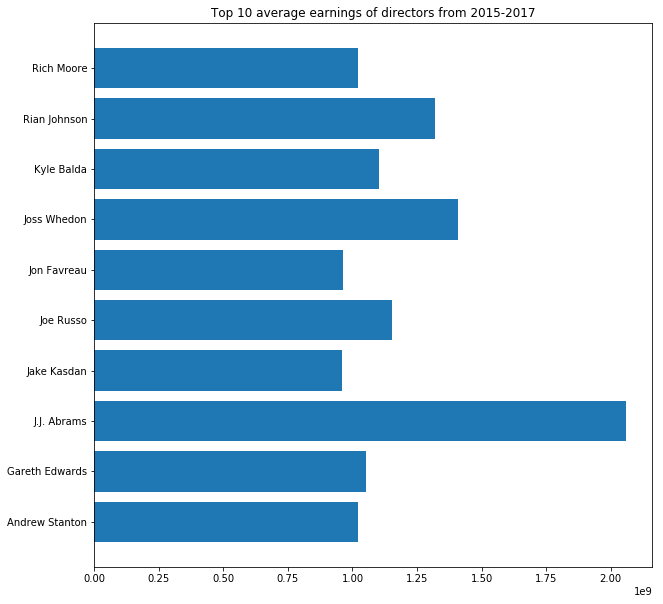

In [183]:
fig, ax = plt.subplots(1,figsize=(10,10))
ax.barh(top_10_directors.index, width = top_10_directors['ww_agg'] )
ax.set_title('Top 10 average earnings of directors from 2015-2017')

In [178]:
top_10_directors

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget,is_franchise
Director,,,,,,,
J.J. Abrams,936662225.0,1.122000e+09,306000000.0,2.058662e+09,21.445322,19.539096,1.0
Joss Whedon,459005868.0,9.492129e+08,330600000.0,1.408219e+09,21.065591,19.616420,1.0
Rian Johnson,620181382.0,7.000329e+08,10000000.0,1.320214e+09,21.001060,16.118096,1.0
Joe Russo,408084349.0,7.452201e+08,250000000.0,1.153304e+09,20.865897,19.336971,1.0
Kyle Balda,300335035.0,8.005590e+08,74500000.0,1.100894e+09,20.817569,18.126287,1.0
Gareth Edwards,532177324.0,5.188112e+08,200000000.0,1.050988e+09,20.772997,19.113828,1.0
Andrew Stanton,486295561.0,5.363218e+08,200000000.0,1.022617e+09,20.745631,19.113828,1.0
Rich Moore,341268248.0,6.786527e+08,150000000.0,1.019921e+09,20.742991,18.826146,0.0
Jon Favreau,364001123.0,5.999000e+08,175000000.0,9.639011e+08,20.686499,18.980297,0.0


In [102]:
df_clean_data['Genre'].unique()

array(['Adventure', 'Musical', 'Action', 'Horror', 'Drama',
       'Thriller/Suspense', 'Comedy', 'Black Comedy', 'Western',
       'Romantic Comedy', 'Documentary', 'Concert/Performance',
       'Multiple Genres', nan], dtype=object)

In [103]:
def parse_genre(dataframe):
    genre = dataframe['Genre']
    return genre
    

In [105]:
genre = parse_genre(df_clean_data)

In [107]:
df_clean_data_trim.iloc[:,3:]

,Production Budget,Source,ww_agg,log_ww_agg,log_budget,MPAA Rating,runtime
0,10000000,Original Screenplay,1320214241,21.001060,16.118096,PG-13,150
1,160000000,Remake,1263109573,20.956842,18.890684,PG,123
2,250000000,Original Screenplay,1237466026,20.936332,19.336971,PG-13,136
3,75000000,Original Screenplay,1034542646,20.757225,18.132999,PG,90
4,90000000,Original Screenplay,958513171,20.680894,18.315320,PG-13,119
5,175000000,Based on Comic/Graphic Novel,880210429,20.595672,18.980297,PG-13,133
6,200000000,Based on Comic/Graphic Novel,863197744,20.576154,19.113828,PG-13,136
7,180000000,Based on Comic/Graphic Novel,850653412,20.561515,19.008467,PG-13,130
8,150000000,Based on Comic/Graphic Novel,817012815,20.521165,18.826146,PG-13,141
9,175000000,Based on Folk Tale/Legend/Fairytale,800398408,20.500620,18.980297,PG,105


In [19]:
df_clean_data['Production Method'].unique()

array(['Live Action', 'Animation/Live Action', 'Digital Animation',
       'Multiple Production Methods', 'Hand Animation',
       'Stop-Motion Animation', nan], dtype=object)

In [20]:
type(df_clean_data['Production Method'][0])

str

In [21]:
def parse_prod_method(dataframe):
    prod_method = dataframe['Production Method']
    return prod_method
    

In [22]:
prod_method = parse_prod_method(df_clean_data)

In [26]:
df_clean_data['Creative Type'].isna().sum()

2

In [28]:
def parse_creative(dataframe):
    creative = dataframe['Creative Type']
    return creative

In [29]:
creative = parse_creative(df_clean_data)

In [32]:
df_clean_data['Domestic Releases']

0       December 15th 2017 (Wide) by Walt DisneyDecemb...
1       March 17th 2017 (Wide) by Walt DisneyMarch 17t...
2       April 14th 2017 (Wide) by UniversalApril 14th ...
3                      June 30th 2017 (Wide) by Universal
4              December 20th 2017 (Wide) by Sony Pictures
5       July 7th 2017 (Wide) by Sony PicturesJuly 7th ...
6                      May 5th 2017 (Wide) by Walt Disney
7                 November 3rd 2017 (Wide) by Walt Disney
8                    June 2nd 2017 (Wide) by Warner Bros.
9                November 22nd 2017 (Wide) by Walt Disney
10      May 26th 2017 (Wide) by Walt DisneyMay 26th 20...
11              September 8th 2017 (Wide) by Warner Bros.
12              November 17th 2017 (Wide) by Warner Bros.
13              March 3rd 2017 (Wide) by 20th Century Fox
14      June 21st 2017 (Wide) by Paramount PicturesJun...
15      March 10th 2017 (Wide) by Warner Bros.March 10...
16             March 31st 2017 (Wide) by 20th Century Fox
17      July 2

In [45]:
one = df_clean_data['Domestic Releases'][0]
fifteen = df_clean_data['Domestic Releases'][1557]

In [46]:
fifteen == fifteen

False

In [47]:
one == one

True

In [88]:
def parse_release_date(dataframe):
    months = []
    days = []
    years = []
    for date in dataframe['Domestic Releases']:
        if date == date: #checking if null. if true then not null
            month = list(date.split(' '))[0]
            day = list(date.split(' '))[1]
            year = list(date.split(' '))[2]
        else:
            month = None
            day = None
            year = None
        months.append(month)
        days.append(day)
        years.append(year)
    return months, days, years

In [89]:
months, days, years = parse_release_date(df_clean_data)

In [90]:
pd.DataFrame(data = {'month': months, 'day': days, 'year': years})

,day,month,year
0,15th,December,2017
1,17th,March,2017
2,14th,April,2017
3,30th,June,2017
4,20th,December,2017
5,7th,July,2017
6,5th,May,2017
7,3rd,November,2017
8,2nd,June,2017
9,22nd,November,2017


In [145]:
budget = df_clean_data['Production Budget'].fillna(10000000, inplace=False)
budget


0        10000000
1       160000000
2       250000000
3        75000000
4        90000000
5       175000000
6       200000000
7       180000000
8       150000000
9       175000000
10      230000000
11       35000000
12      300000000
13      127000000
14      217000000
15      185000000
16      125000000
17      150000000
18      152000000
19       84000000
20      195000000
21      104000000
22       10000000
23       55000000
24       55000000
25       85000000
26       80000000
27       15000000
28       20000000
29      111000000
          ...    
1553       850000
1554     10000000
1555     10000000
1556     10000000
1557     10000000
1558     10000000
1559     10000000
1560     10000000
1561      1500000
1562     10000000
1563     10000000
1564     10000000
1565       300000
1566     10000000
1567     10000000
1568     10000000
1569     10000000
1570     10000000
1571     10000000
1572     10000000
1573     10000000
1574      9000000
1575      1000000
1576     10000000
1577     1

In [152]:
# df_clean_data_trim['WW Aggregate'] = int(df_clean_data_trim['Domestic Box Office']) + int(df_clean_data_trim['International Box Office'])
# df_clean_data_trim
def create_ww(dataframe):
    dom = dataframe['Domestic Box Office'].fillna(0, inplace=False)
    intl = dataframe['International Box Office'].fillna(0, inplace=False)
    #nulls will be replaced with $25 mil for now, but might change depending on model results.
    budget = dataframe['Production Budget'].fillna(25000000, inplace=False)
    
    df = pd.DataFrame()
    
    dom_numeric = dom.apply(pd.to_numeric)
    intl_numeric = intl.apply(pd.to_numeric)
    
    df['ww_agg'] = dom_numeric + intl_numeric
    df['production_budget'] = budget.apply(pd.to_numeric)

    df['log_ww_agg'] = df['ww_agg'].apply(np.log)
    df['log_budget'] = df['production_budget'].apply(np.log)

    return df

In [153]:
df_x = create_ww(df_clean_data)
df_x

,ww_agg,production_budget,log_ww_agg,log_budget
0,1320214241,25000000,21.001060,17.034386
1,1263109573,160000000,20.956842,18.890684
2,1237466026,250000000,20.936332,19.336971
3,1034542646,75000000,20.757225,18.132999
4,958513171,90000000,20.680894,18.315320
5,880210429,175000000,20.595672,18.980297
6,863197744,200000000,20.576154,19.113828
7,850653412,180000000,20.561515,19.008467
8,817012815,150000000,20.521165,18.826146
9,800398408,175000000,20.500620,18.980297


In [160]:
def build_clean_dataset(dataframe):
    df = create_ww(dataframe)
    df['ratings'] = parse_mpaa_col(dataframe)
    df['runtime'] = parse_runtime_col(dataframe)
    df['is_franchise'] = create_franchise_dummy(dataframe)
    df['genre'] = parse_genre(dataframe)
    df['prod_method'] = parse_prod_method(dataframe)
    df['creative'] = parse_creative(dataframe)
    df['source'] = parse_source(dataframe)
    df['month'], df['day'], df['year'] = parse_release_date(dataframe)
    return df

def parse_mpaa_col(dataframe):
    ratings = dataframe.loc[:,'MPAA Rating']
    ratings = ratings.apply(lambda a: str(a))
    ratings = ratings.apply(lambda b: b.split()[0])
    ratings = ratings.apply(strip_text)
    return ratings

def strip_text(bad_text):
    if bad_text.endswith('(Rating'):
        bad_text = bad_text.replace('(Rating', '')
    return bad_text

def parse_runtime_col(dataframe):
    runtime = dataframe['Running Time']
    runtime = runtime.fillna(90) #This was the runtime with highest frequency
    runtime = runtime.apply(lambda x: str(x))
    runtime = runtime.apply(lambda x: x.split()[0])
    runtime = runtime.apply(int)
    return runtime

def create_franchise_dummy(dataframe):
    franchise = dataframe['Franchise'].isna() ^ 1
    return franchise

def parse_genre(dataframe):
    genre = dataframe['Genre']
    return genre

def parse_prod_method(dataframe):
    prod_method = dataframe['Production Method']
    return prod_method

def parse_creative(dataframe):
    creative = dataframe['Creative Type']
    return creative

def parse_source(dataframe):
    source = dataframe['Source']
    return source

def parse_release_date(dataframe):
    months = []
    days = []
    years = []
    for date in dataframe['Domestic Releases']:
        if date == date: #checking if null. if true then not null
            month = list(date.split(' '))[0]
            day = list(date.split(' '))[1]
            year = list(date.split(' '))[2]
        else:
            month = None
            day = None
            year = None
        months.append(month)
        days.append(day)
        years.append(year)
    return months, days, years

In [161]:
df_ready_for_model = build_clean_dataset(df_clean_data)

In [193]:
df_ready_for_model.head()

,ww_agg,production_budget,log_ww_agg,log_budget,ratings,runtime,is_franchise,genre,prod_method,creative,source,month,day,year
0,1320214241,25000000,21.001060,17.034386,PG-13,150,True,Adventure,Live Action,Science Fiction,Original Screenplay,December,15th,2017
1,1263109573,160000000,20.956842,18.890684,PG,123,False,Musical,Animation/Live Action,Fantasy,Remake,March,17th,2017
2,1237466026,250000000,20.936332,19.336971,PG-13,136,True,Action,Live Action,Contemporary Fiction,Original Screenplay,April,14th,2017
3,1034542646,75000000,20.757225,18.132999,PG,90,True,Adventure,Digital Animation,Kids Fiction,Original Screenplay,June,30th,2017
4,958513171,90000000,20.680894,18.315320,PG-13,119,True,Adventure,Live Action,Fantasy,Original Screenplay,December,20th,2017


In [238]:
import pymc3 as pm

In [243]:
with pm.Model() as model:
    sd = pm.HalfNormal('sd', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    observed = pm.Normal('observed', intercept + beta_runtime * df_ready_for_model.runtime, sd, observed=df_ready_for_model.log_ww_agg)
    

In [245]:
with model:
    trace = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_runtime, intercept, sd_log__]
100%|██████████| 11000/11000 [00:32<00:00, 342.42it/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4a14f25390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4a14d61d68>]], dtype=object)

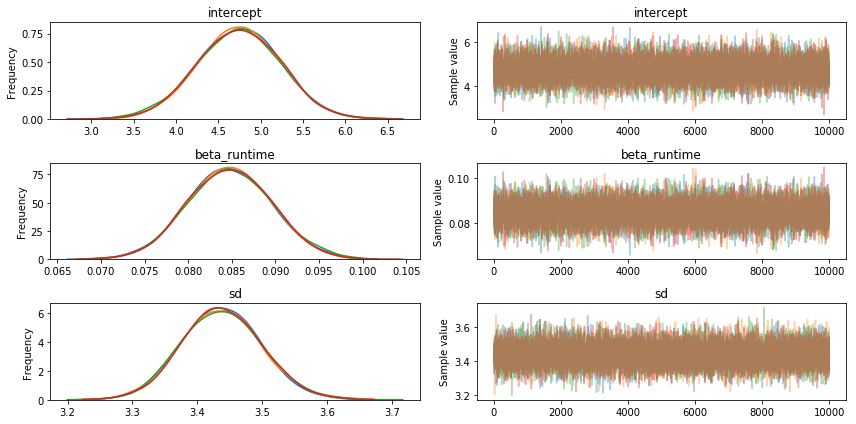

In [246]:
pm.traceplot(trace)

In [250]:
trace[0]

{'beta_runtime': 0.085179238921092276,
 'intercept': 4.7274801533272566,
 'sd': 3.4025746734563289,
 'sd_log__': 1.224532401946695}

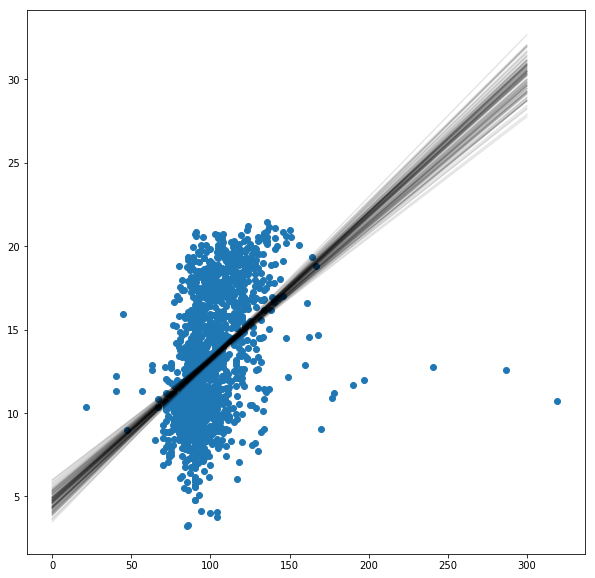

In [252]:
fig, ax = plt.subplots(1, figsize=(10,10))
for i, point in enumerate(trace):
    if i % 100 == 0:
        ax.plot([0,300],[point['intercept'],point['intercept'] + point['beta_runtime'] * 300], 'k', alpha=.1)
        
# ax.plot([0,300],[4.7,4.7 + .085 * 300])
ax.scatter(df_ready_for_model.runtime, df_ready_for_model.log_ww_agg)

In [253]:
df_ready_for_model.head()

,ww_agg,production_budget,log_ww_agg,log_budget,ratings,runtime,is_franchise,genre,prod_method,creative,source,month,day,year
0,1320214241,25000000,21.001060,17.034386,PG-13,150,True,Adventure,Live Action,Science Fiction,Original Screenplay,December,15th,2017
1,1263109573,160000000,20.956842,18.890684,PG,123,False,Musical,Animation/Live Action,Fantasy,Remake,March,17th,2017
2,1237466026,250000000,20.936332,19.336971,PG-13,136,True,Action,Live Action,Contemporary Fiction,Original Screenplay,April,14th,2017
3,1034542646,75000000,20.757225,18.132999,PG,90,True,Adventure,Digital Animation,Kids Fiction,Original Screenplay,June,30th,2017
4,958513171,90000000,20.680894,18.315320,PG-13,119,True,Adventure,Live Action,Fantasy,Original Screenplay,December,20th,2017


In [277]:
df_dummies_ratings = pd.get_dummies(df_ready_for_model.ratings)
df_dummies_ratings

,G,Not,PG,PG-13,R,nan
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,0,1,0,0
3,0,0,1,0,0,0
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,0,1,0,0,0


In [289]:
df_dummies_genre = pd.get_dummies(df_ready_for_model.genre)
df_dummies_genre

,Action,Adventure,Black Comedy,Comedy,Concert/Performance,Documentary,Drama,Horror,Multiple Genres,Musical,Romantic Comedy,Thriller/Suspense,Western
0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0


In [288]:
df_dummies_prod_method = pd.get_dummies(df_ready_for_model.prod_method)
df_dummies_prod_method

,Animation/Live Action,Digital Animation,Hand Animation,Live Action,Multiple Production Methods,Stop-Motion Animation
0,0,0,0,1,0,0
1,1,0,0,0,0,0
2,0,0,0,1,0,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,0,1,0,0
7,0,0,0,1,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0


In [290]:
df_dummies_creative = pd.get_dummies(df_ready_for_model.creative)
df_dummies_creative

,Contemporary Fiction,Dramatization,Factual,Fantasy,Historical Fiction,Kids Fiction,Multiple Creative Types,Science Fiction,Super Hero
0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,1,0,0,0


In [291]:
df_dummies_source = pd.get_dummies(df_ready_for_model.source)
df_dummies_source

,Based on Comic/Graphic Novel,Based on Factual Book/Article,Based on Fiction Book/Short Story,Based on Folk Tale/Legend/Fairytale,Based on Game,Based on Movie,Based on Musical Group,Based on Musical or Opera,Based on Play,Based on Real Life Events,Based on Religious Text,Based on Short Film,Based on TV,Based on Theme Park Ride,Based on Toy,Based on Web Series,Compilation,Original Screenplay,Remake,Spin-Off
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [292]:
df_dummies_month = pd.get_dummies(df_ready_for_model.month)
df_dummies_month

,April,August,December,Fall,February,January,July,June,March,May,November,October,September
0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,1,0,0


In [297]:
df_with_dummies = df_ready_for_model[['log_ww_agg', 'log_budget', 'runtime', 'is_franchise']]

In [298]:
df_with_all_dummies = pd.concat([df_with_dummies, df_dummies_ratings, df_dummies_genre, df_dummies_prod_method, df_dummies_creative,
          df_dummies_source, df_dummies_month], axis =1)
df_with_all_dummies

,log_ww_agg,log_budget,runtime,is_franchise,G,Not,PG,PG-13,R,nan,...,Fall,February,January,July,June,March,May,November,October,September
0,21.001060,17.034386,150,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20.956842,18.890684,123,False,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,20.936332,19.336971,136,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,20.757225,18.132999,90,True,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20.680894,18.315320,119,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,20.595672,18.980297,133,True,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
6,20.576154,19.113828,136,True,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,20.561515,19.008467,130,True,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
8,20.521165,18.826146,141,True,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,20.500620,18.980297,105,False,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [299]:
len(df_with_all_dummies.columns)

71

In [303]:
with pm.Model() as model_2:
    sd = pm.HalfNormal('sd', 100)
#     sd_log_budget = pm.HalfNormal('sd_log_budget', 100)
    intercept = pm.Normal('intercept', 0, 100)
    beta_runtime = pm.Normal('beta_runtime', 0, 100)
    beta_log_budget = pm.Normal('beta_log_budget', 17, 5)
    observed_runtime = pm.Normal('observed_runtime', intercept + beta_runtime * df_ready_for_model.runtime
                                                     + beta_log_budget * df_ready_for_model.log_budget, 
                                                     sd, 
                                                     observed=df_ready_for_model.log_ww_agg)


In [304]:
with model_2:
    trace = pm.sample(10000, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta_log_budget, beta_runtime, intercept, sd_log__]
100%|██████████| 11000/11000 [02:26<00:00, 75.17it/s]
The acceptance probability does not match the target. It is 0.880317210143, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49e4722080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f49e45e8390>]], dtype=object)

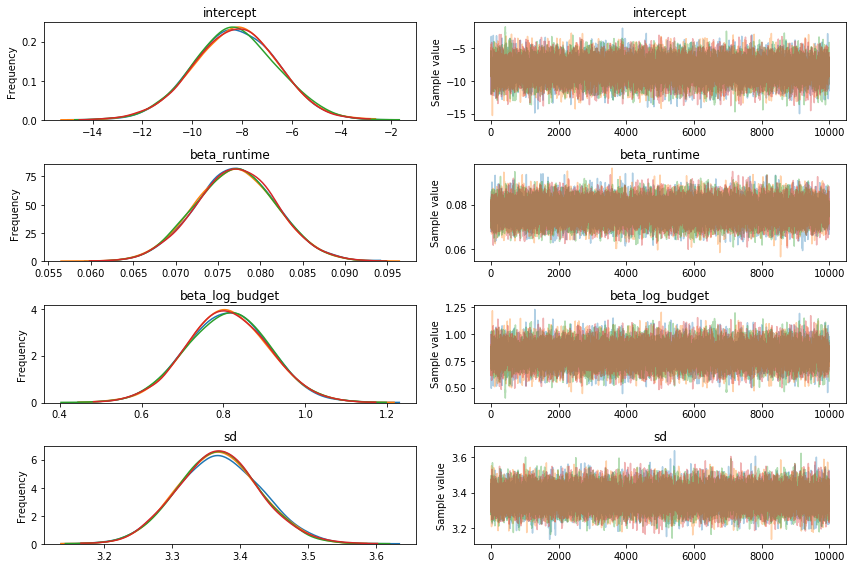

In [305]:
pm.traceplot(trace)

In [308]:
model_2.sd

sd

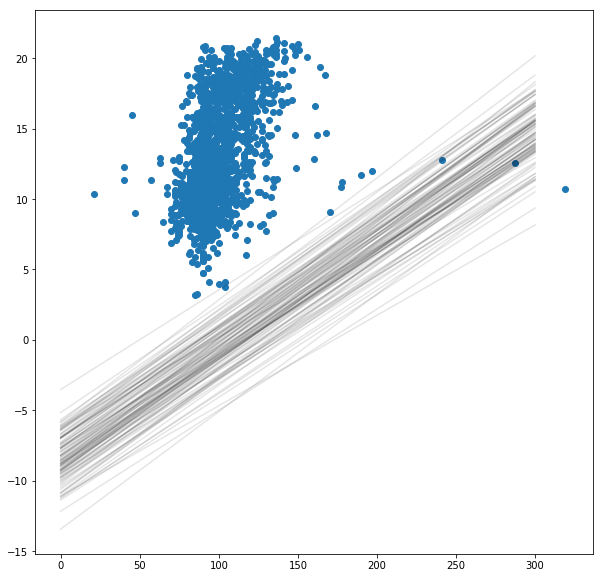

In [317]:
fig, ax = plt.subplots(1, figsize=(10,10))
for i, point in enumerate(trace):
    if i % 100 == 0:
        ax.plot([0,300],[point['intercept'], point['intercept'] + point['beta_runtime'] * 300], 'k', alpha=.1)
        
# ax.plot([0,300],[4.7,4.7 + .085 * 300])
ax.scatter(df_ready_for_model.runtime, df_ready_for_model.log_ww_agg)

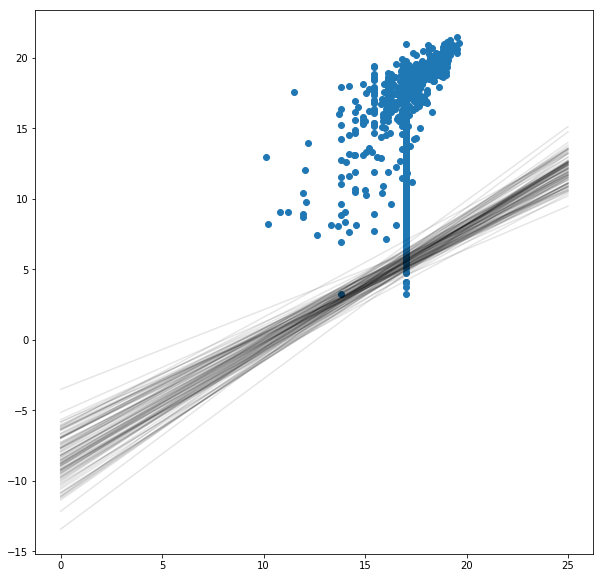

In [318]:
fig, ax = plt.subplots(1, figsize=(10,10))
for i, point in enumerate(trace):
    if i % 100 == 0:
        ax.plot([0,25],[point['intercept'],point['intercept'] + point['beta_log_budget'] * 25], 'k', alpha=.1)

# ax.plot([0,300],[4.7,4.7 + .085 * 300])
ax.scatter(df_ready_for_model.log_budget, df_ready_for_model.log_ww_agg)

Text(0.5,1,'Frequencies of log(budget)')

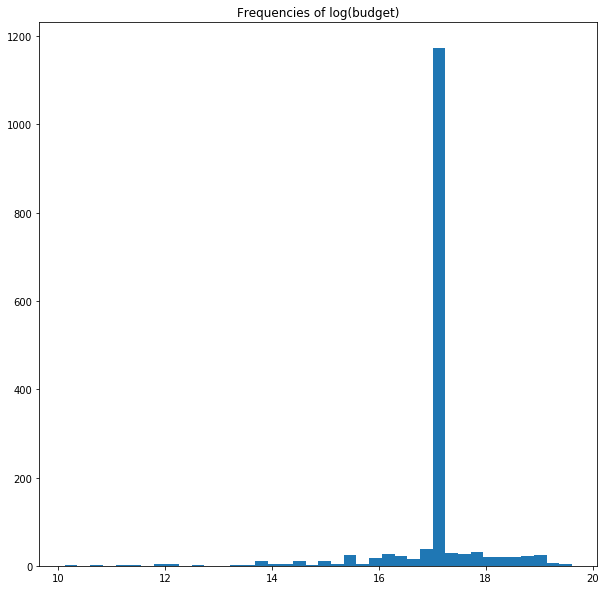

In [309]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_ready_for_model['log_budget'], bins = 40)
ax.set_title('Frequencies of log(budget)')

Text(0.5,1,'Frequencies of log(revenue)')

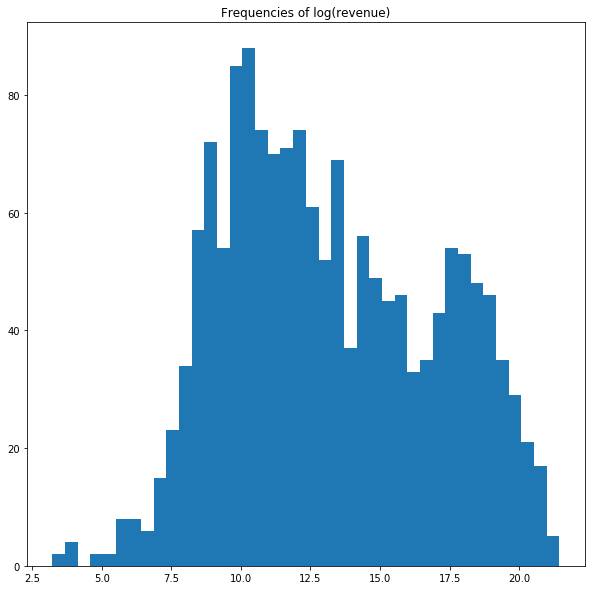

In [189]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_ready_for_model['log_ww_agg'], bins = 40)
ax.set_title('Frequencies of log(revenue)')